# Pós-Graduação - Ciência de Dados & Big Data

## Pontifícia Universidade Católica de Minas Gerais (PUC-MG)

### Aluno: Victor Hugo Negrisoli

### Regressão Logística

#### Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Função para configurar os plots da Matplotlib

In [3]:
def configurar_plot_com_dimensoes(titulo, x, y, h, w):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(h, w)
    plt.show()

In [4]:
def configurar_plot(titulo, x, y):
    configurar_plot_com_dimensoes(titulo, x, y, 16, 8)

#### Importando e transformando os dados

In [137]:
def definir_dados():
    dados = pd.read_excel('dados/Dados Titanic - IA.xlsx')

    dados = dados.rename(columns = {
        'Passageiro': 'passageiro',
        'Sobrevivente': 'sobrevivente',
        'Classe': 'classe',
        'Nome': 'nome',
        'Sexo': 'sexo',
        'Idade': 'idade',
        'Irmãos': 'irmaos',
        'Pais': 'pais',
        'Tarifa': 'tarifa',
    })
    
    return dados

dados = definir_dados()
dados.head()

,passageiro,sobrevivente,classe,nome,sexo,idade,irmaos,pais,tarifa
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,712833.00
2,3,1,3,"Heikkinen, Miss. Laina",feminino,26.0,0,0,7925.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,53.10
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,8.05


### Análise exploratória dos dados: análise de valor da tarifa por classe

classe
1    74605868.55
2     3334064.60
3    19168241.15
Name: tarifa, dtype: float64


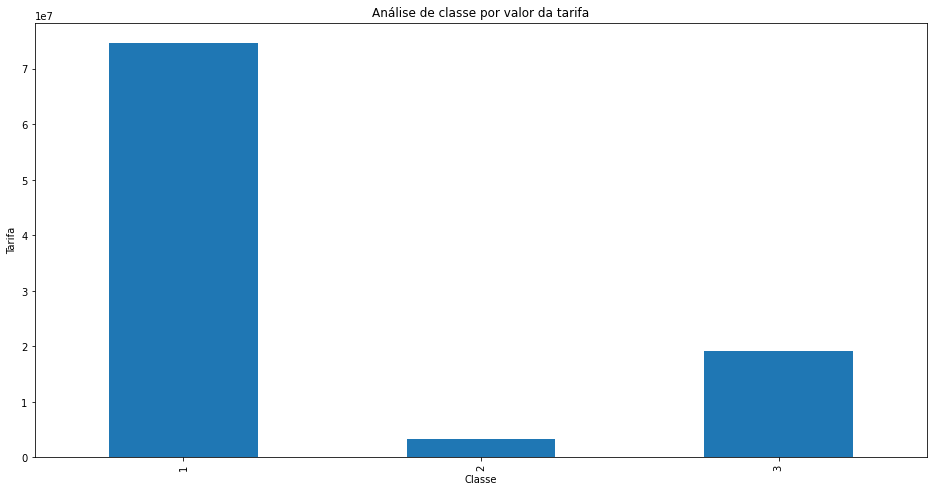

In [216]:
dados_agrupados = dados.groupby('classe', as_index = True).sum()['tarifa']

print(dados_agrupados)

dados_agrupados.plot(kind = 'bar')
configurar_plot('Análise de classe por valor da tarifa', 'Classe', 'Tarifa')

### Análise de número de sobreviventes por idade

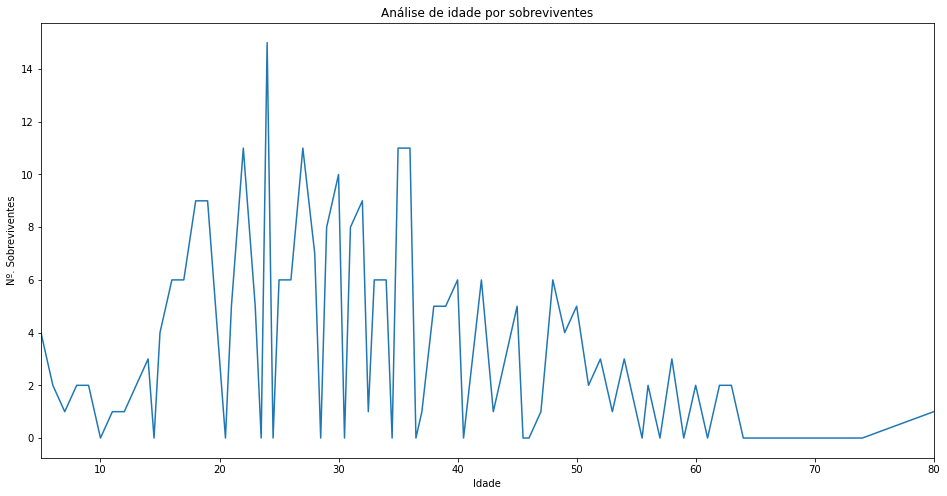

In [214]:
dados_agrupados = dados[dados['idade'] >= 5].groupby('idade', as_index = True).sum()['sobrevivente']

dados_agrupados.plot(kind = 'line')
configurar_plot('Análise de idade por sobreviventes', 'Idade', 'Nº. Sobreviventes')

### Análise do Nº sobreviventes por sexo

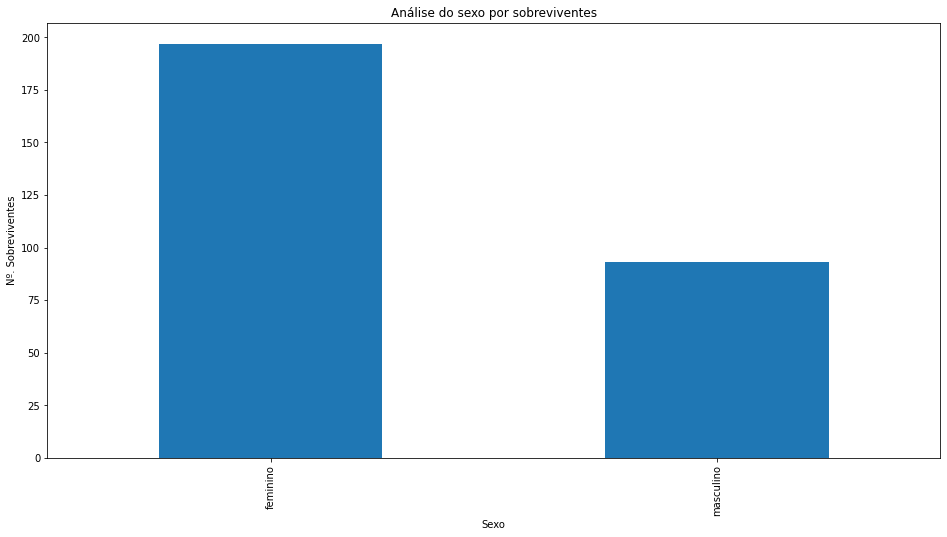

In [213]:
dados_agrupados = dados.groupby('sexo', as_index = True).sum()['sobrevivente']

dados_agrupados.plot(kind = 'bar')
configurar_plot('Análise do sexo por sobreviventes', 'Sexo', 'Nº. Sobreviventes')

### Verificando a regressão logística com a Seaborn analisando idade, sobreviventes e o sexo

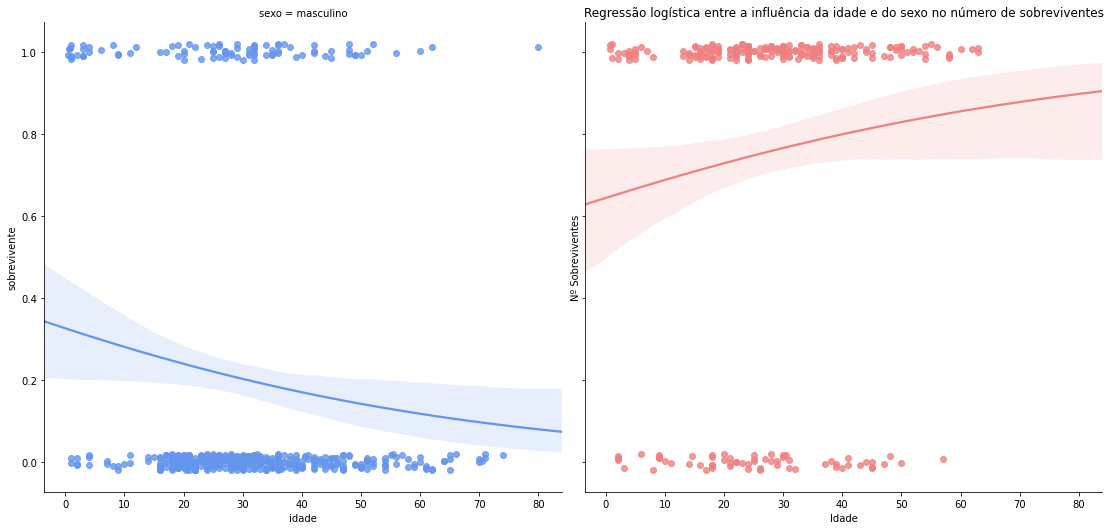

In [146]:
cores = dict(masculino="#6495ED", feminino="#F08080")

sns.lmplot(
    x = 'idade', 
    y = 'sobrevivente',
    col = 'sexo',
    hue = 'sexo',
    data = dados,
    palette = cores,
    y_jitter = .02,
    logistic = True,
    truncate = False
)

configurar_plot(
    'Regressão logística entre a influência da idade e do sexo no número de sobreviventes', 
    'Idade', 
    'Nº Sobreviventes'
)

### Treinando um modelo com a Scikit-Learn: usando a Regressão Logística e visualizando o comparativo do Nº de sobreviventes pelo sexo

In [162]:
dados = definir_dados()

x = dados['sobrevivente'].values.reshape(-1, 1)
y = dados['sexo'].values.reshape(-1, 1)

In [163]:
dados.head(10)

,passageiro,sobrevivente,classe,nome,sexo,idade,irmaos,pais,tarifa
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,712833.00
2,3,1,3,"Heikkinen, Miss. Laina",feminino,26.0,0,0,7925.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,53.10
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,8.05
5,7,0,1,"McCarthy, Mr. Timothy J",masculino,54.0,0,0,518625.00
6,8,0,3,"Palsson, Master. Gosta Leonard",masculino,2.0,3,1,21075.00
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",feminino,27.0,0,2,111333.00
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",feminino,14.0,1,0,300708.00
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",feminino,4.0,1,1,16.70


### Treinando o modelo de dados

In [166]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.33, random_state = 42)

reg = LogisticRegression()
reg.fit(x_treino, y_treino)
p = reg.predict(x_teste)
p

c:\users\lord_negrisoli\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['masculino', 'feminino', 'feminino', 'feminino', 'masculino',
       'feminino', 'feminino', 'feminino', 'masculino', 'masculino',
       'feminino', 'feminino', 'feminino', 'masculino', 'feminino',
       'masculino', 'masculino', 'feminino', 'masculino', 'feminino',
       'masculino', 'feminino', 'masculino', 'feminino', 'masculino',
       'masculino', 'masculino', 'masculino', 'masculino', 'masculino',
       'masculino', 'masculino', 'feminino', 'masculino', 'masculino',
       'feminino', 'masculino', 'feminino', 'masculino', 'masculino',
       'feminino', 'masculino', 'feminino', 'masculino', 'masculino',
       'feminino', 'feminino', 'masculino', 'masculino', 'feminino',
       'masculino', 'masculino', 'feminino', 'masculino', 'masculino',
       'masculino', 'masculino', 'feminino', 'masculino', 'feminino',
       'feminino', 'masculino', 'feminino', 'masculino', 'feminino',
       'masculino', 'feminino', 'feminino', 'feminino', 'masculino',
       'masculino', 'fe

### Verificando o score de aceitação entre as variáveis de predição

In [196]:
reg.score(x, y)

0.7801120448179272

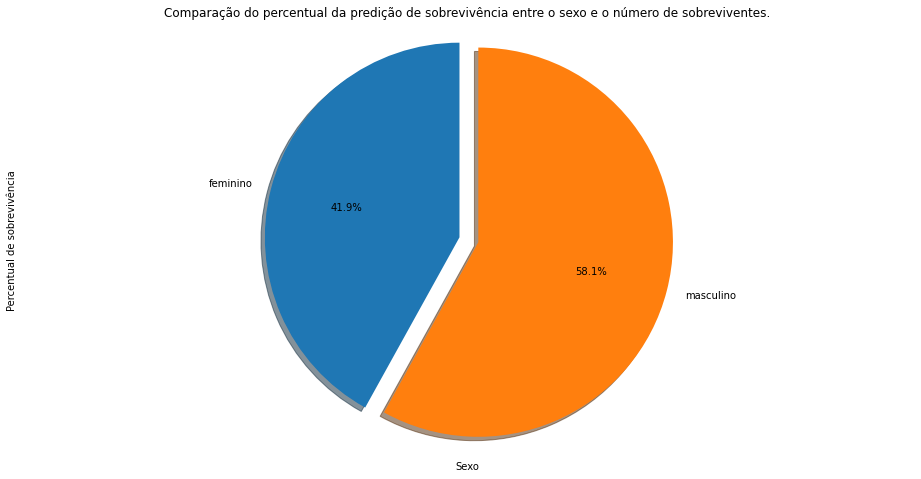

In [217]:
predicoes = pd.DataFrame({'sexo': p, 'total': 1}).groupby('sexo', as_index = False).sum()


fig1, ax1 = plt.subplots()

ax1.pie(
    predicoes['total'],
    explode = (0, 0.1),
    labels=predicoes['sexo'],
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)

ax1.axis('equal')
configurar_plot(
    'Comparação do percentual da predição de sobrevivência entre o sexo e o número de sobreviventes.',
    'Sexo',
    'Percentual de sobrevivência'
)